In [1]:
import numpy as np
from scipy.stats import ks_2samp
from scipy import stats
import matplotlib.pyplot as plt
import h5py

import sys
sys.path.append('../py_files/')
import weights 


In [2]:
control_sample_file_loc = "/home/pranavsatheesh/host_galaxies/data/control_files/"
pop_file_loc = "/home/pranavsatheesh/host_galaxies/merger_file_runs/"

control_sample_file = control_sample_file_loc+"control_sample.hdf5"
pop_file = pop_file_loc + "population_sort_gas-100_dm-100_star-100_bh-001.hdf5"

In [3]:
control_sample = h5py.File(control_sample_file, 'r')
pop = h5py.File(pop_file, 'r')

In [4]:
N_mergers = len(pop['merging_population']["z"])
print(N_mergers)

467


In [5]:
control_z_avg = np.array([weights.control_prop_avg("z", i,pop,control_sample) for i in range(N_mergers)])

control_Mstar_avg = np.array([weights.control_prop_avg("Mstar", i,pop,control_sample) for i in range(N_mergers)])

In [6]:
Mstar_binsize = 0.5  # specify the binsize
Mstar_min = 7
Mstar_max = 12
Nbins_Ms = int((Mstar_max-Mstar_min)/Mstar_binsize)
Mstar_bins = np.linspace(Mstar_min,Mstar_max,Nbins_Ms)

z_binsize = 0.5
z_min = 0
z_max = 5
Nbins_z = int((z_max - z_min) / z_binsize)
z_bins = np.linspace(z_min, z_max, Nbins_z)

In [138]:
D_z,p_value_z = ks_2samp(np.concatenate(control_sample["z"]),pop['merging_population']['z'])
D_Mstar,p_value_Mstar = ks_2samp(np.concatenate(control_sample["Mstar"]),np.log10(pop['merging_population']['Mstar']))
print(f"Redshift matching gives KS statistic of {D_z:2.3f} and p-value of {p_value_z}")
print(f"Mstar matching gives KS statistic of {D_Mstar:.3f} and p-value of {p_value_Mstar}")

Redshift matching gives KS statistic of 0.124 and p-value of 1.1456643122457658e-06
Mstar matching gives KS statistic of 1.000 and p-value of 0.0


(array([0.00355533, 0.        , 0.00711065, 0.00711065, 0.04621926,
        0.16710039, 0.43019462, 0.62929295, 0.2986475 , 0.06755122]),
 array([-3.28035093, -2.67677143, -2.07319193, -1.46961243, -0.86603293,
        -0.26245343,  0.34112607,  0.94470556,  1.54828506,  2.15186456,
         2.75544406]),
 [<matplotlib.patches.Polygon at 0x15304a921240>])

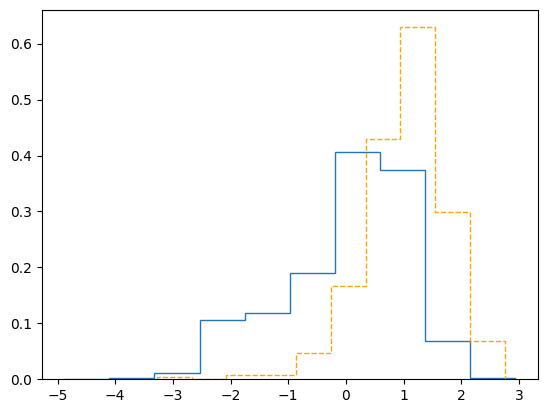

In [119]:
plt.hist(np.log10(np.concatenate(control_sample["SFR"][:].flatten())[np.concatenate(control_sample["SFR"][:].flatten()) > 0]), histtype="step", density=True)
plt.hist(np.log10(pop['merging_population']['SFR'][pop['merging_population']['SFR'][:] > 0]), histtype="step", label="mergers", color="orange", linestyle="--", density=True)

In [136]:
z_flat = np.concatenate(control_sample["z"])
subhalo_ids_flat = np.concatenate(control_sample["subhalo_ids"])

# Create pairs of (z, subhalo_id)
pairs = np.array(list(zip(z_flat, subhalo_ids_flat)))

# Get unique pairs and their indices
unique_pairs, unique_indices = np.unique(pairs, axis=0, return_index=True)

# Generate a mask for unique pairs
mask = np.zeros(len(pairs), dtype=bool)
mask[unique_indices] = True

# Example usage
print("Number of unique pairs:", len(unique_pairs))
print("Mask for unique pairs:", mask)

Number of unique pairs: 58017
Mask for unique pairs: [ True  True  True ...  True  True  True]


(array([0.00355533, 0.        , 0.00711065, 0.00711065, 0.04621926,
        0.16710039, 0.43019462, 0.62929295, 0.2986475 , 0.06755122]),
 array([-3.28035093, -2.67677143, -2.07319193, -1.46961243, -0.86603293,
        -0.26245343,  0.34112607,  0.94470556,  1.54828506,  2.15186456,
         2.75544406]),
 [<matplotlib.patches.Polygon at 0x1530582d7760>])

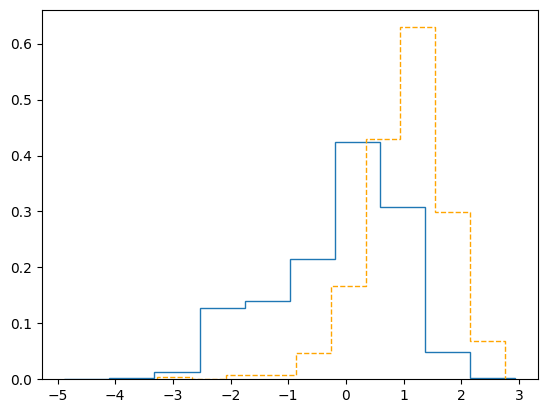

In [137]:
plt.hist(np.log10(np.concatenate(control_sample["SFR"][:].flatten())[mask][np.concatenate(control_sample["SFR"][:].flatten())[mask] > 0]), histtype="step", density=True)
plt.hist(np.log10(pop['merging_population']['SFR'][pop['merging_population']['SFR'][:] > 0]), histtype="step", label="mergers", color="orange", linestyle="--", density=True)

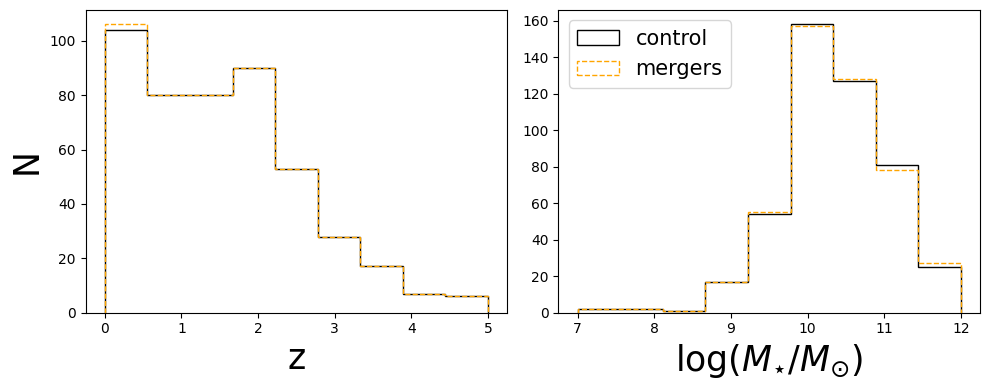

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].hist(control_z_avg, bins=z_bins, histtype="step", color="black", label="control")
ax[0].hist(pop['merging_population']['z'], bins=z_bins, histtype="step", label="mergers", color="orange", linestyle="--")
ax[0].set_xlabel("z", fontsize=25)
ax[0].set_ylabel("N", fontsize=25)

bins_Mstar = np.histogram_bin_edges(np.log10(np.concatenate((control_Mstar_avg, pop['merging_population']['Mstar']))), bins='auto')
ax[1].hist(np.log10(control_Mstar_avg), bins=Mstar_bins, histtype="step", color="black", label="control")
ax[1].hist(np.log10(pop['merging_population']['Mstar']), bins=Mstar_bins, histtype="step", label="mergers", color="orange", linestyle="--")
ax[1].legend(fontsize=15)
ax[1].set_xlabel("$\log(M_{\star}/M_{\odot})$", fontsize=25)

fig.tight_layout()

In [8]:
control_SFR_avg = np.array([weights.control_prop_avg("SFR", i,pop,control_sample) for i in range(N_mergers)])
control_Mgas_avg = np.array([weights.control_prop_avg("Mgas", i,pop,control_sample) for i in range(N_mergers)])

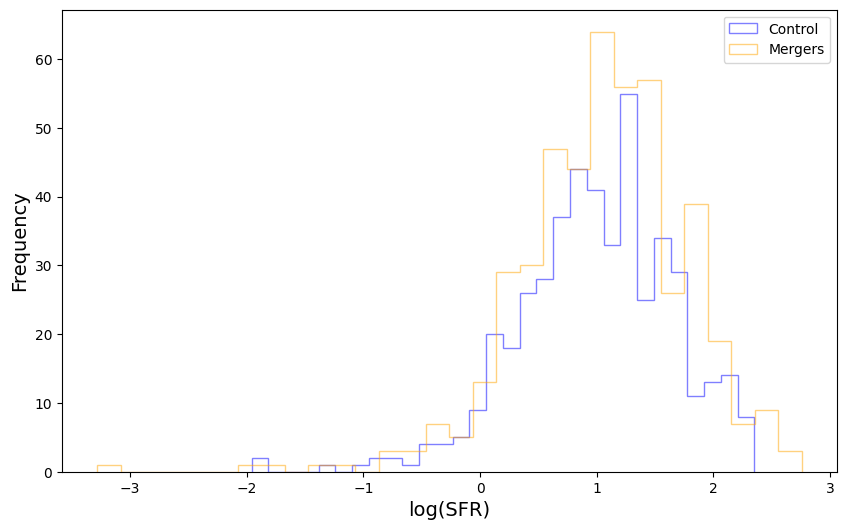

In [35]:
plt.figure(figsize=(10, 6))
plt.hist(np.log10(control_SFR_avg[control_SFR_avg>0]), bins=20, alpha=0.5, label='Control', color='blue',histtype="step")
plt.hist(np.log10(pop['merging_population']['SFR'][pop['merging_population']['SFR'][:]>0]), bins=20, alpha=0.5, label='Mergers', color='orange',histtype="step")
plt.xlabel('log(SFR)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.show()

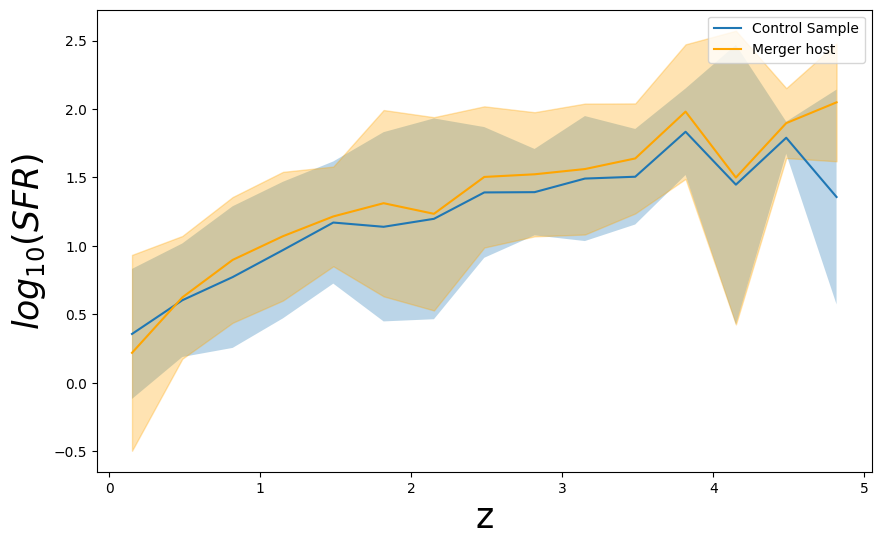

In [29]:
z_binsize=0.3
z_min = 0
z_max = 5
Nbins_z = int((z_max - z_min) / z_binsize)
z_bins = np.linspace(z_min, z_max, Nbins_z)

# Calculate the average and standard deviation of log10(SFR) in each redshift bin for control sample
avg_logSFR_control = []
std_logSFR_control = []

for i in range(len(z_bins) - 1):
    mask = (control_z_avg >= z_bins[i]) & (control_z_avg < z_bins[i + 1])
    logSFR_control = np.log10(control_SFR_avg[mask][control_SFR_avg[mask]>0])
    avg_logSFR_control.append(np.mean(logSFR_control))
    std_logSFR_control.append(np.std(logSFR_control))

# Convert to numpy arrays for plotting
avg_logSFR_control = np.array(avg_logSFR_control)
std_logSFR_control = np.array(std_logSFR_control)

# Calculate the average and standard deviation of log10(SFR) in each redshift bin for merging galaxies
avg_logSFR_mergers = []
std_logSFR_mergers = []

for i in range(len(z_bins) - 1):
    mask = (pop['merging_population']['z'][:] >= z_bins[i]) & (pop['merging_population']['z'][:] < z_bins[i + 1])
    logSFR_mergers = np.log10(pop['merging_population']['SFR'][mask][pop['merging_population']['SFR'][mask]>0])
    avg_logSFR_mergers.append(np.mean(logSFR_mergers))
    std_logSFR_mergers.append(np.std(logSFR_mergers))

# Convert to numpy arrays for plotting
avg_logSFR_mergers = np.array(avg_logSFR_mergers)
std_logSFR_mergers = np.array(std_logSFR_mergers)

# Plot the average and spread of log10(SFR) across redshift for both control and merging galaxies
plt.figure(figsize=(10, 6))
plt.plot(z_bins[:-1] + z_binsize / 2, avg_logSFR_control, label='Control Sample')
plt.fill_between(z_bins[:-1] + z_binsize / 2, avg_logSFR_control - std_logSFR_control, avg_logSFR_control + std_logSFR_control, alpha=0.3)

plt.plot(z_bins[:-1] + z_binsize / 2, avg_logSFR_mergers, label='Merger host', color='orange')
plt.fill_between(z_bins[:-1] + z_binsize / 2, avg_logSFR_mergers - std_logSFR_mergers, avg_logSFR_mergers + std_logSFR_mergers, color='orange', alpha=0.3)

plt.xlabel('z', fontsize=25)
plt.ylabel('$log_{10}(SFR)$', fontsize=25)
plt.legend()
plt.show()

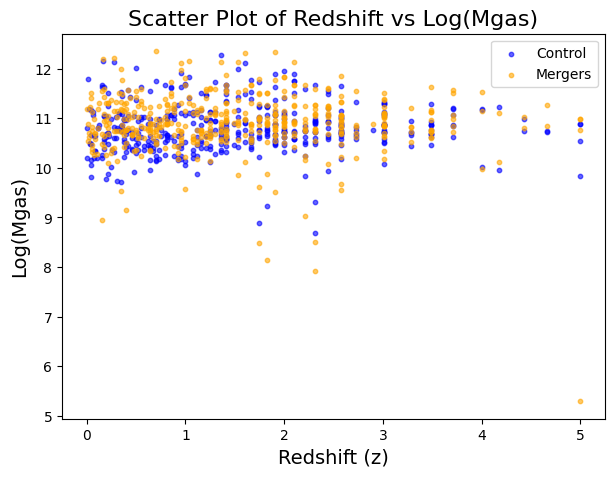

In [13]:
plt.figure(figsize=(7,5))
plt.scatter(control_z_avg, np.log10(control_Mgas_avg), label='Control', color='blue', alpha=0.6, s=10)
plt.scatter(pop['merging_population']['z'], np.log10(pop['merging_population']['Mgas']), label='Mergers', color='orange', alpha=0.6, s=10)
plt.xlabel('Redshift (z)', fontsize=14)
plt.ylabel('Log(Mgas)', fontsize=14)
plt.title('Scatter Plot of Redshift vs Log(Mgas)', fontsize=16)
plt.legend()
plt.show()

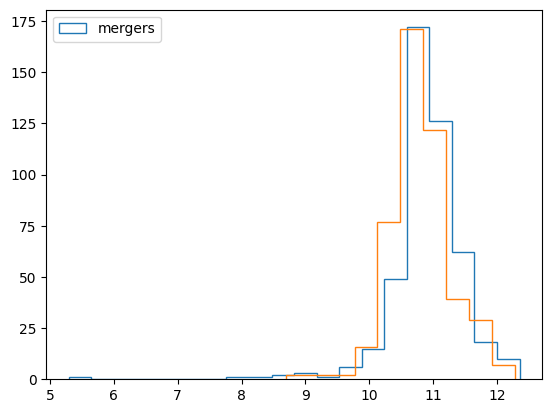

In [64]:
plt.hist(np.log10(pop["merging_population"]["Mgas"][:]),label="mergers",histtype="step",bins=20)
plt.hist(np.log10(control_Mgas_avg),histtype="step",bins=10)
plt.legend()

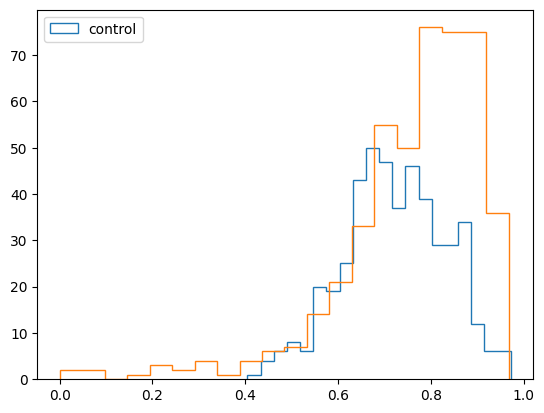

In [90]:
control_fgas_avg = control_Mgas_avg/(control_Mgas_avg+control_Mstar_avg)
pop_fgas = pop["merging_population"]["Mgas"][:]/(pop["merging_population"]["Mgas"][:]+pop["merging_population"]["Mstar"][:])

plt.hist(control_fgas_avg,bins=20,histtype="step",label="control")
plt.hist(pop_fgas,bins=20,histtype="step")
plt.legend()

In [87]:
np.median(control_fgas_avg)

0.7222316949811214

In [ ]:
np.median(pop_fgas)

0.7590815023433862